In [20]:
### imports ###
import pygmt
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap

import pandas as pd

%matplotlib inline
%matplotlib widget

In [3]:
# Major tectonic blocks and faults are marked by black lines (after Styron et al. (2010) and Taylor and An Yin (2009))
# https://github.com/HimaTibetMap/HimaTibetMap/tree/master
# Styron, R., Taylor, M., and Okoronkwo, K., 2010, HimaTibetMap-1.0: new ‘web-2.0’ online database of active structures from the Indo-Asian collision, Eos, vol.91 no. 20.
# Taylor, Michael, and An Yin, 2009, "Active structures of the Himalayan-Tibetan orogen and their relationships to earthquake distribution, contemporary strain field, and Cenozoic volcanism." Geosphere vol. 5, no. 3, pp 199-214.
# gem_active_faults.gmt https://github.com/GEMScienceTools/gem-global-active-faults
# Slab contours are from the slab model of Hayes et al. (2018).
# Hayes, G., 2018, Slab2 - A Comprehensive Subduction Zone Geometry Model: U.S. Geological Survey data release, https://doi.org/10.5066/F7PV6JNV. 

# Seismicity from the Harvard CMT cffatalogue (Dziewonski et al. (1981), Ekstr ̈om et al. (2012), https://www.globalcmt.org/.
# InSAR DURATION ONLY 20160309 20240710


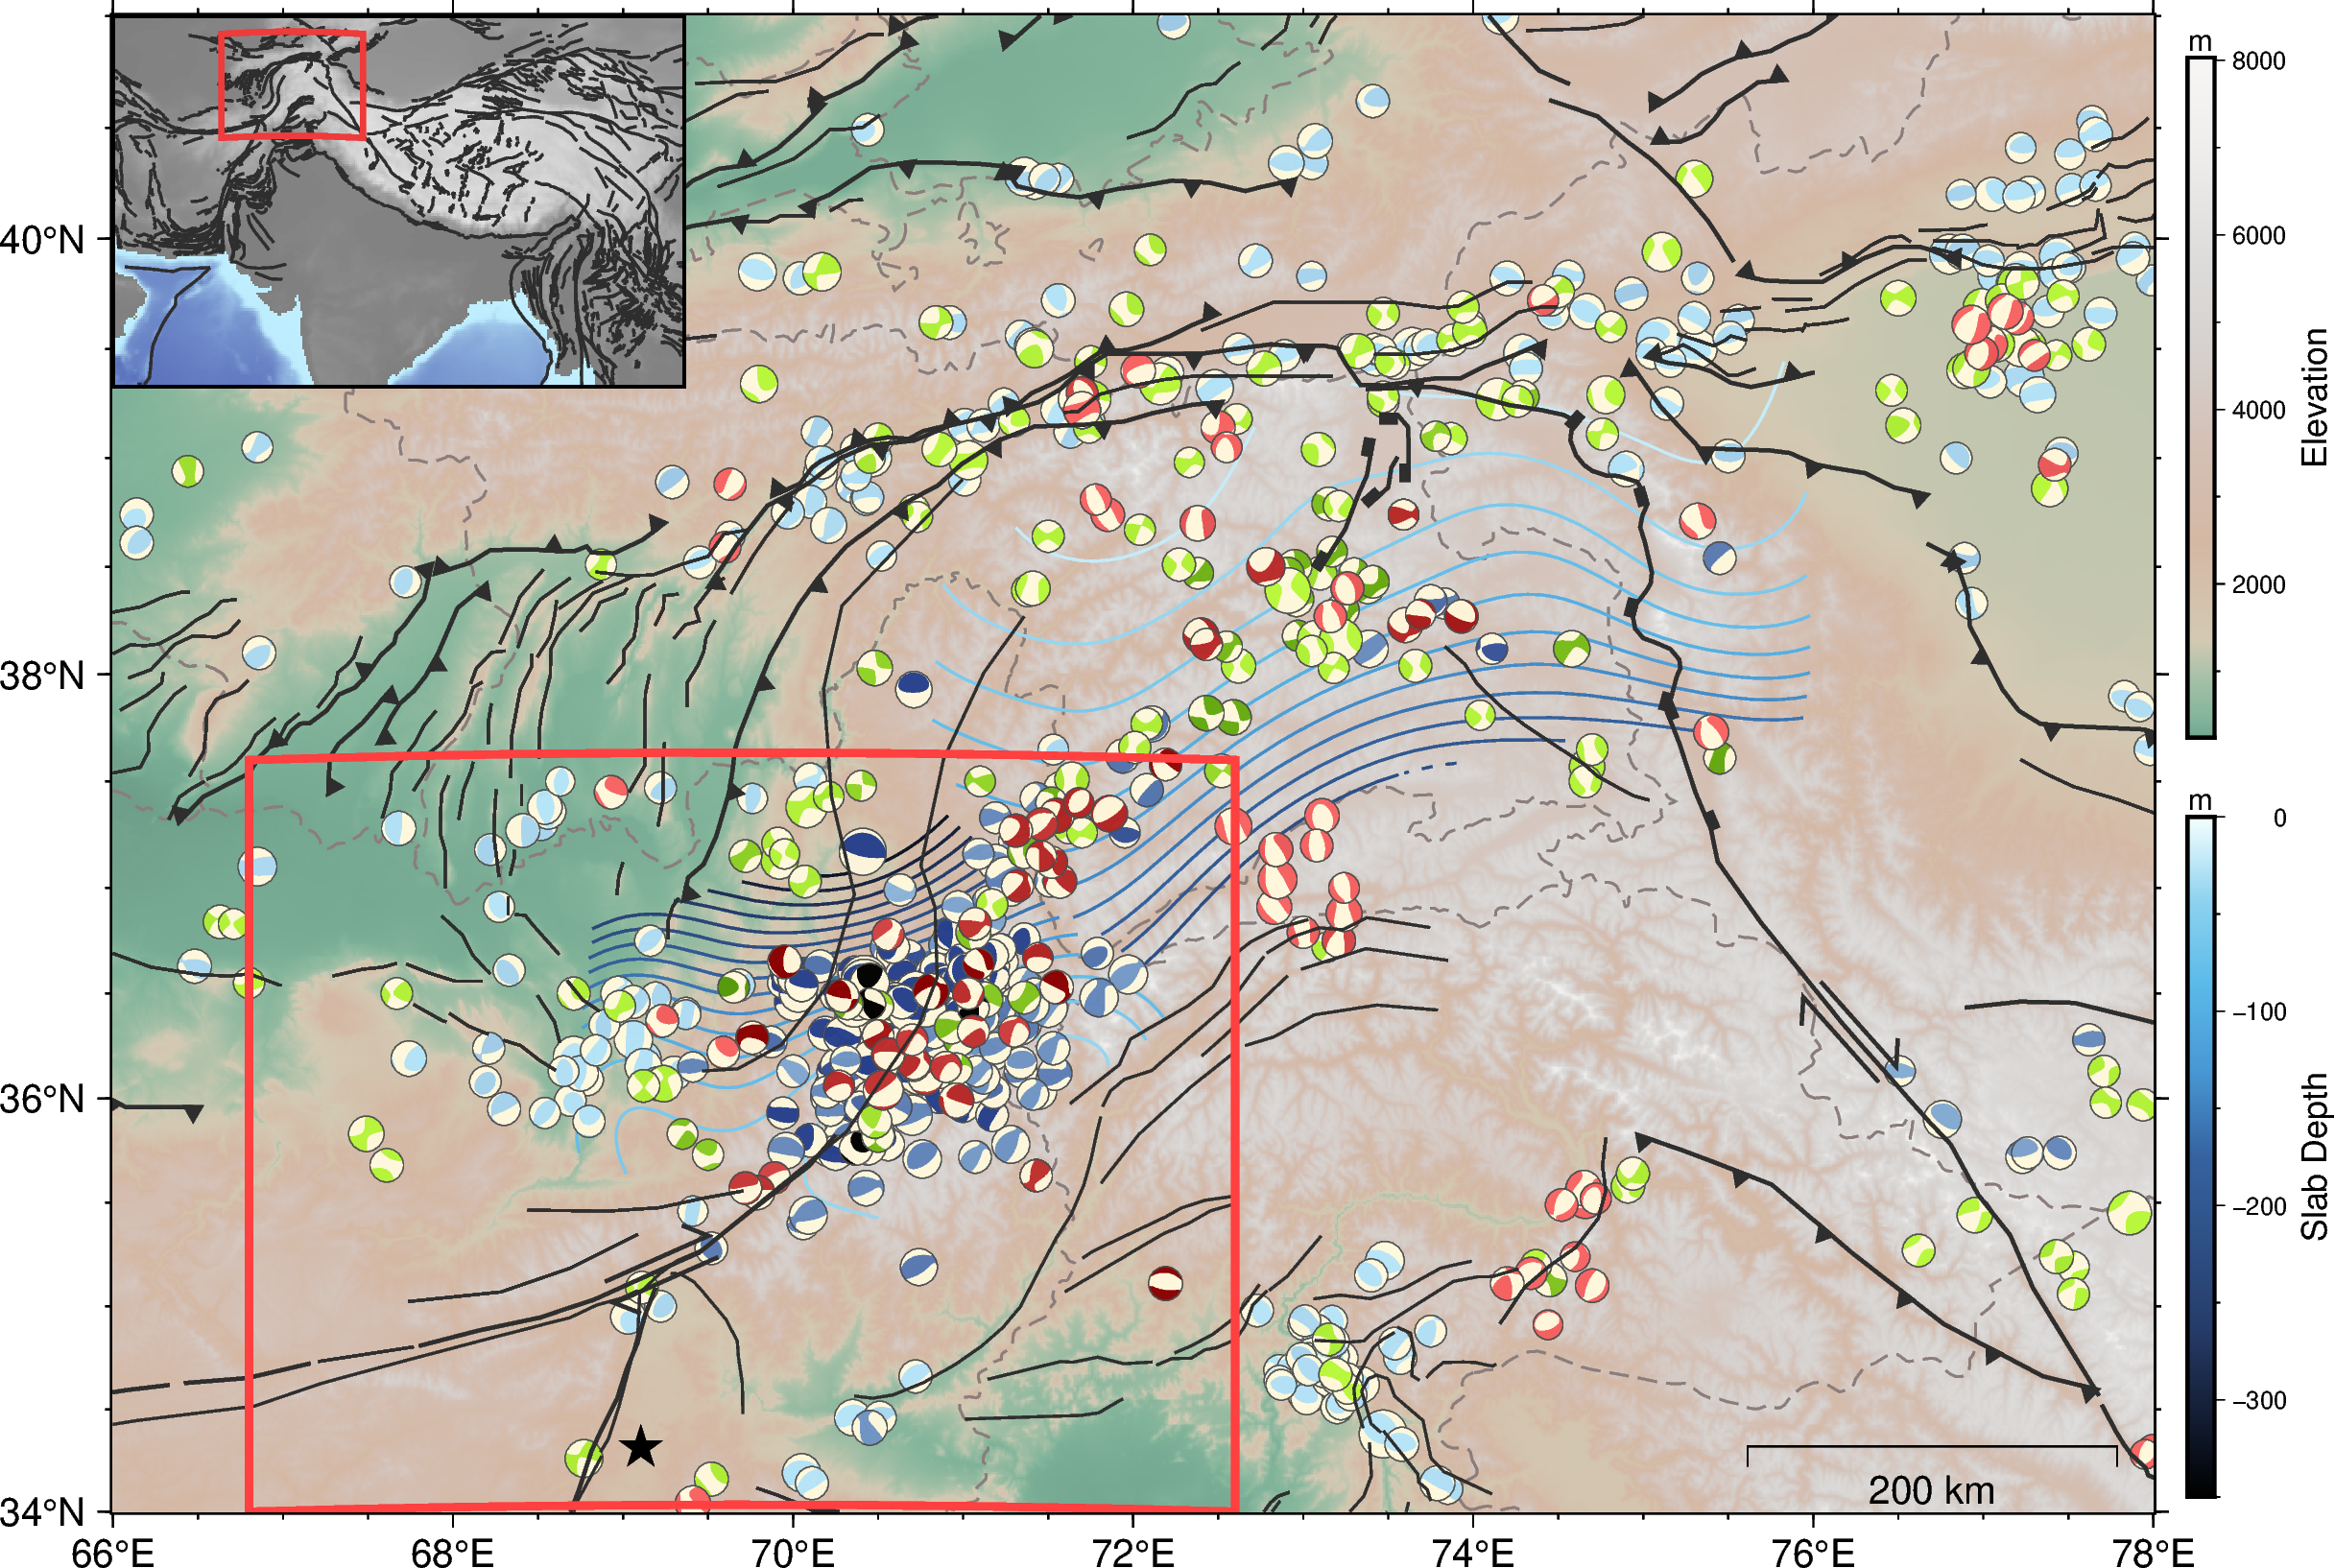

In [219]:
### GMT basemap ###
import os
dir = "/Users/rochelle/Documents/GitHub/Leeds-Research-Internship/"
os.chdir(dir)

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=66 # lower left corner longitude 
llcrnrlat=34 # lower left corner latitude
urcrnrlon=78 # upper right corner longitude
urcrnrlat=41 # upper right corner latitude


proj_scale_w = 18 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i

meca_scale = "0.28c"
meca_trans = 2
###########################################

def center(llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat):
    centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
    centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
    return centerlon, centerlat

region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]

grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)


fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain") # figure config (borders)
centerlon_hid, centerlat_hid = center(*region)

fig.coast(region=region,\
          projection="M%s/%s/%s%s" % (centerlon_hid, centerlat_hid, proj_scale_w, proj_scale_unit),\
          land="lightgrey", water="white",
          frame=["WSne", "a2f0.5"])

          # Mercator
          # a2f0.5 --> major ticks every 2 and minor ticks every 0.5

# fig.grdimage(grid=grid, cmap="bin/cpt/custom/seabluelandgrey.cpt")
fig.grdimage(grid=grid, cmap="elevation")

fig.coast(map_scale="g76.7/34.27+w200k", shorelines="1/0.5p", borders="1/0.6p, mistyrose4,-")

## plot slab2.0 here
pygmt.makecpt(output="bin/cpt/abyss_slab2.0", series=[-350, 0], cmap="bin/cpt/GMT_supported/abyss.cpt")
# pygmt.makecpt(output="bin/cpt/viridis_slab2.0", series=[-350, 200], cmap="bin/cpt/GMT_supported/viridis.cpt")
fig.plot(data="bin/hin_slab2_dep_02.24.18_contours.in", pen=f"0.65p", cmap="bin/cpt/abyss_slab2.0") # Hindu Kush, bounding coords 66 74 40 34
fig.plot(data="bin/pam_slab2_dep_02.26.18_contours.in", pen=f"0.65p", cmap="bin/cpt/abyss_slab2.0") # Pamir, bounding coords 68 78 41 35



## plotting HarvardCMT earthquakes by fault style 20160309 20240710
fig.meca(
    spec="bin/Harvard_CMT_full/HarvardCMT_thrust_dropname.xy",
    convention="mt", scale=meca_scale,
    cmap="bin/cpt/custom/blue.cpt",
    extensionfill="cornsilk",
    # Draw a 0.5 points thick dark gray ("gray30") solid outline via
    # the pen parameter [Default is "0.25p,black,solid"]
    pen="thinnest,gray30,solid", transparency=meca_trans,
)

fig.meca(
    spec="bin/Harvard_CMT_full/HarvardCMT_ss_dropname.xy",
    convention="mt", scale=meca_scale,
    cmap="bin/cpt/custom/green.cpt",
    extensionfill="cornsilk",
    pen="thinnest,gray30,solid", transparency=meca_trans,
)

fig.meca(
    spec="bin/Harvard_CMT_full/HarvardCMT_normal_dropname.xy",
    convention="mt", scale=meca_scale,
    cmap="bin/cpt/custom/red.cpt",
    extensionfill="cornsilk",
    pen="thinnest,gray30,solid", transparency=meca_trans,
)

## plotting faults
# https://www.pygmt.org/dev/gallery/lines/linefronts.html
# fig.plot(data="bin/faults/HimaTibetMap.gmt", pen=f"0.7p,black") # all faults
fill_fault = "grey18"
fig.plot(data="bin/faults/HimaTibetMap.gmt", pen=f"0.65p,"+fill_fault) # all faults
fig.plot(data="bin/faults/gem_active_faults.gmt", pen=f"0.65p,"+fill_fault) # gem active faults
fig.plot(data="bin/faults/normal.gmt", style="f1c/0.13c+l+b", pen=f"0.95p,"+fill_fault, fill=fill_fault) # normal
fig.plot(data="bin/faults/thrust.gmt", style="f1c/0.13c+l+t", pen=f"0.95p,"+fill_fault, fill=fill_fault) # thrust
fig.plot(data="bin/faults/dextral.gmt", style="f5c/1c+r+s45+o2.25c", pen=f"0.95p,"+fill_fault, fill=fill_fault) # dextral (right)
fig.plot(data="bin/faults/sinistral.gmt", style="f5c/1c+l+s45+o2.25c", pen=f"0.95p,"+fill_fault, fill=fill_fault) # sinistral (left)

## plotting cities and stuff
fig.plot(x=69.1042, y=34.3131, style="a0.38c", pen="black", fill="black")  # Kabul


fig.plot(data=[[66.8, 34, 72.6, 37.6]], 
             style="r+s", pen="2p,brown1")

fig.colorbar(frame=["x+lElevation", "y+lm"], position="JCR+o0.3/3.23c+w6c")
fig.colorbar(
    cmap="bin/cpt/abyss_slab2.0", frame=["xa100f50+lSlab Depth", "y+lm"],
    # offset (+o) by 0.5 cm horizontally and 0.8 cm vertically from anchor
    # point, and plotted horizontally (+h)
    position="JCR+o0.3/-3.47c+w6c"
)

#########################
## plotting corner map
'''
llcrnrlon=66 # lower left corner longitude 
llcrnrlat=34 # lower left corner latitude
urcrnrlon=78 # upper right corner longitude
urcrnrlat=41 # upper right corner latitude
'''
region_glo=[57, 105, 15, 42]
centerlon_glo, centerlat_glo = center(*region_glo)
with fig.inset(position="jTL+o0.02c", box="+gwhite+p2p", region=region_glo,
               projection="M%s/%s/5c" % (centerlon_glo, centerlat_glo)):
    fig.coast(water="white", land="grey", shorelines="1/0.5p")
    grid = pygmt.datasets.load_earth_relief("10m", registration="gridline")
    fig.grdimage(grid=grid, cmap="bin/cpt/custom/seabluelandgrey.cpt")
    fig.plot(data="bin/faults/gem_active_faults.gmt", pen=f"0.65p,"+fill_fault) # gem active faults
    fig.plot(data=[[llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat]], 
             style="r+s", pen="1.5p,brown2")

fig.show()
fig.savefig("figures/Hindu_Kush_study_area_HarvardCMTfull.png")

In [ ]:
# quick cpt code

pygmt.makecpt(cmap="sienna", series=[20, 320, 20], colour_model="lightsalmon2, sienna3")

In [37]:
# quick code to drop names

file_path = "bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_normal.xy"
headers = ["lon", "lat", "depth", "mrr", "mtt", "mpp", "mrt", "mrp", "mtp", "iexp", "X", "Y", "name"]
df = pd.read_csv(file_path, delim_whitespace=True, names=headers, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df.drop(df.columns[[10, 11, 12]], axis=1, inplace=True)
df.to_csv('bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_normal_dropname.xy', sep='\t', index=False)

/var/folders/xp/d0lbwvf108l78qt1c6tlwylh0000gn/T/ipykernel_540/2618791458.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, names=headers, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


In [39]:
def num_lines(txt_file):
    lines = sum(1 for _ in open(txt_file))

    return lines

assert num_lines("bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_normal.xy") == num_lines("bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_normal_dropname.xy")

071A_05440_131313.geo.E.tif   20190926_20191008
071A_05440_131313.geo.N.tif   20190926_20191020
071A_05440_131313.geo.U.tif   20190926_20191101
071A_05440_131313.geo.hgt.tif 20190926_20191113
071A_05440_131313.geo.mli.tif 20190926_20200312
20141010_20141103             20190926_20200324
20141010_20141127             20190926_20200604
20141010_20141221             20190926_20200616
20141010_20150114             20190926_20200628
20141103_20141127             20190926_20200908
20141103_20141221             20190926_20200920
20141103_20150114             20191008_20191020
20141103_20150207             20191008_20191101
20141127_20141221             20191008_20191113
20141127_20150114             20191008_20191125
20141127_20150207             20191020_20191101
20141127_20150315             20191020_20191113
20141221_20150114             20191020_20191125
20141221_20150207             20191020_20191207
20141221_20150315             20191101_20191113
20141221_20150408             20191101_2

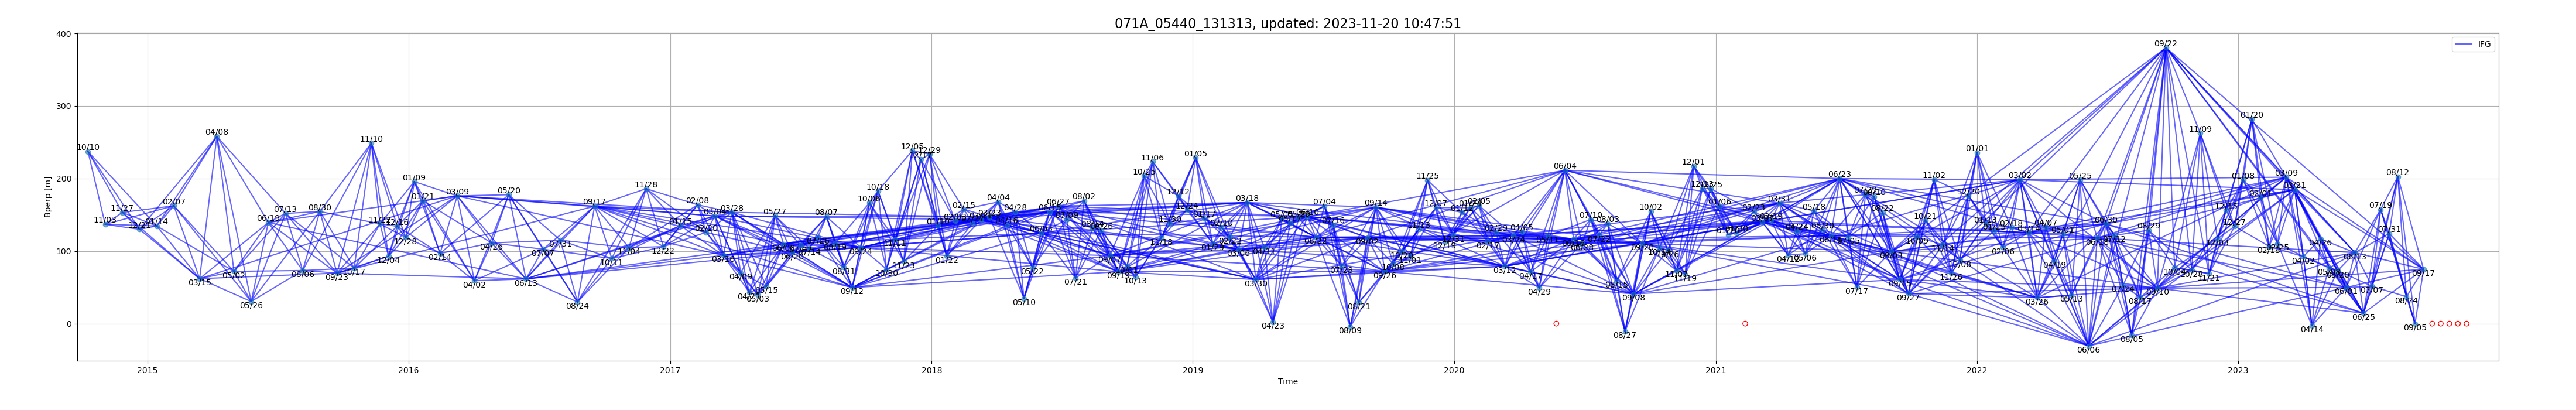

In [7]:
from IPython.display import Image #as display
import os

def display(png):
    if not os.path.exists(png):
        print('This png file does not exist, recheck please')
    else:
        return Image(png)
    
frame = '071A_05440_131313'
framedir = os.path.join(os.environ['HOME'],frame + "_test_reunwrapping")
os.chdir(framedir)
os.chdir(framedir + "/GEOC")
! ls


png = "network.png"
display(png)